Análise exploratória - Julio Oliveira da Silva

In [54]:
import pandas as pd
import numpy as np

#### Dataset
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

1. Diabetes_012: 0 = sem diabetes; 1 = pré-diabetes; 2 = diabete
2. HighBP: 0 = sem PA elevada; 1 = PA alta (PA = Pressão Alta)
3. HighChol: 0 = sem colesterol alto; 1 = colesterol alto
4. CholCheck: 0 = sem verificação de colesterol em 5 anos; 1 = sim verificação de colesterol em 5 anos
5. BMI: Índice de Massa Corporal (12 a 98)
6. Smoker: Você fumou pelo menos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100 cigarros] 0 = não; 1 = sim
7. Stroke: você teve um derrame. 0 = não; 1 = sim
8. HeartDiseaseorAttack: doença coronariana (DAC) ou infarto do miocárdio (IM) 0 = não; 1 = sim
9. PhysActivity: atividade física nos últimos 30 dias - não inclui trabalho. 0 = não; 1 = sim
10. Fruits: Consumir Fruta 1 ou mais vezes por dia. 0 = não; 1 = sim
11. Veggies: Consumir Legumes 1 ou mais vezes por dia. 0 = não; 1 = sim
12. HvyAlcoholConsump: (homens adultos >=14 doses por semana e mulheres adultas>=7 doses por semana). 0 = não; 1 = sim
13. AnyHealthcare: Possui algum tipo de cobertura de saúde, incluindo plano de saúde, planos pré-pagos como HMO, etc. 0 = não; 1 = sim
14. NoDocbcCost: Houve um momento nos últimos 12 meses em que você precisou consultar um médico, mas não pôde devido ao custo? 0 = não; 1 = sim
15. GenHlth: Você diria que em geral sua saúde é: escala 1-5; 1 = excelente; 2 = muito bom; 3 = bom; 4 = justo; 5 = pobre
16. MentHlth: dias de saúde mental ruim escala 1-30 dias
17. PhysHlth: dias de doença física ou lesão nos últimos 30 dias escala 1-30
18. DiffWalk: Você tem sérias dificuldades para caminhar ou subir escadas? 0 = não; 1 = sim
19. Sex: 0 = feminino; 1 = masculino
20. Age: categoria de idade de 13 níveis (_AGEG5YR consulte o livro de códigos) 1 = 18-24; 9 = 60-64; 13 = 80 ou mais
21. Education: Nível de escolaridade (EDUCA ver livro de códigos) escala 1-6; 1 = Nunca frequentou a escola ou apenas o jardim de infância; 2 = fundamental etc
22. Income: Escala de renda (INCOME2 ver livro de códigos) escala 1-8; 1 = menos de $10.000; 5 = menos de $35.000; 8 = $75.000 ou mais



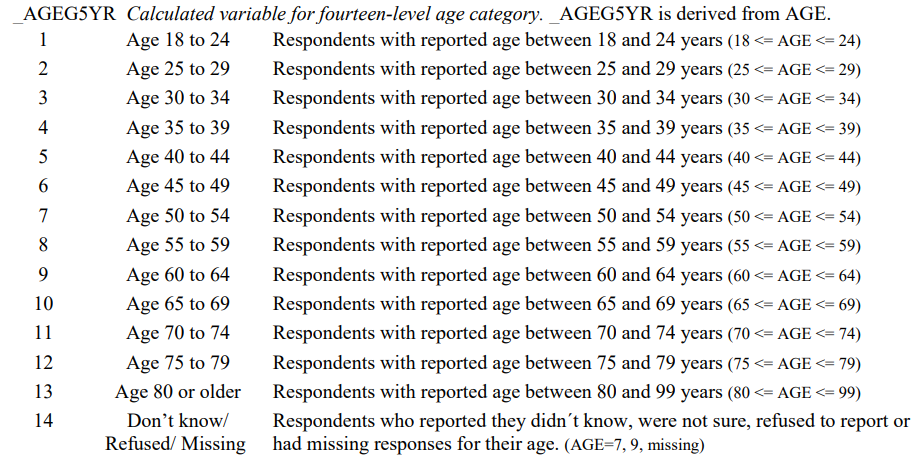

In [60]:
from PIL import Image
img = Image.open('../imgs/_AGEG5YR.png')
img

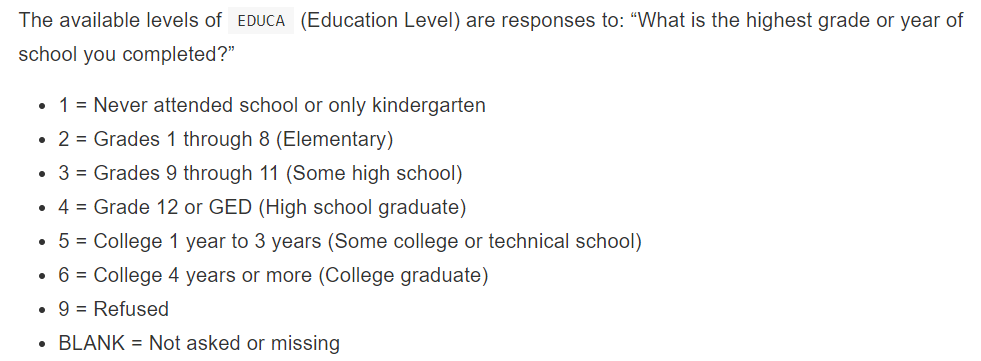

In [3]:
from PIL import Image
img = Image.open('../imgs/EDUCA.png')
img

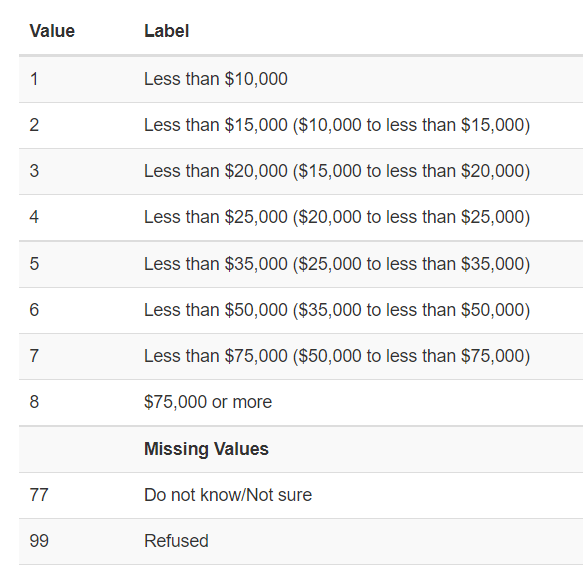

In [4]:
from PIL import Image
img = Image.open('../imgs/INCOME2.png')
img

#### Reduzir uso de memória

In [55]:
def pre_processar(csv_file):
    types={'Sex':'uint16', 'Fruits':'uint16', 'Diabetes_012':'uint16', 'HighBP':'uint16',  'HighChol':'uint16',  'CholCheck':'uint16',  'Smoker':'uint16', 'Stroke':'uint16', 'HeartDiseaseorAttack':'uint16', 'PhysActivity':'uint16', 'Fruits':'uint16', 'Veggies':'uint16', 'HvyAlcoholConsump':'uint16',  'AnyHealthcare':'uint16', 'NoDocbcCost':'uint16', 'GenHlth':'uint16', 'MentHlth':'uint16', 'PhysHlth':'uint16', 'DiffWalk':'uint16', 'Sex':'uint16', 'Age':'uint16', 'Education':'uint16', 'BMI':'uint16', 'Income':'uint16'}
    df = pd.read_csv(csv_file, dtype=types)
    return df

#### Lendo CSV ou Binário/pikle

In [65]:
from pathlib import Path
def read_data(dataset_path, dir="../../datasets/raw/"):
    db_path = Path(f'{dir}/{dataset_path}')

    csv_file = db_path.parent/db_path.with_suffix('.csv').name
    dir="../../datasets/processed/"
    #db_path = Path(f'{dir}/{dataset_path}')
    pkl_file = db_path.parent/db_path.with_suffix('.pkl').name 

    if(pkl_file.exists()): #Quando existir, fazer a leitura do binário
        print('Lendo pkl')
        return pd.read_pickle(pkl_file)
    else:
        print('Lendo CSV')
        df = pre_processar(csv_file) #Fazer os devidos pré-processamentos do CSV
        #df.to_pickle(pkl_file) #Salvando em binário
        return df

In [66]:
df = read_data('diabetes_binary_5050split_health_indicators_BRFSS2015')
df.info(memory_usage='deep')

Lendo CSV
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  uint16 
 2   HighChol              70692 non-null  uint16 
 3   CholCheck             70692 non-null  uint16 
 4   BMI                   70692 non-null  uint16 
 5   Smoker                70692 non-null  uint16 
 6   Stroke                70692 non-null  uint16 
 7   HeartDiseaseorAttack  70692 non-null  uint16 
 8   PhysActivity          70692 non-null  uint16 
 9   Fruits                70692 non-null  uint16 
 10  Veggies               70692 non-null  uint16 
 11  HvyAlcoholConsump     70692 non-null  uint16 
 12  AnyHealthcare         70692 non-null  uint16 
 13  NoDocbcCost           70692 non-null  uint16 
 14  GenHlth               70692 non-null  uint16 
 15  MentHlth 

Uso de memória do data set é de 42.6 MB e foi reduzido para 10.6 MB. A estratégia base foi trasnformar os dados reais/float, em inteiros positivos de 16 bits, uma vez que, para qualquer atributo, os valores minímos são maiores ou igual a zero e máximos são também baixos, abaixo de 100. Veja:

In [67]:
features = df.columns
print('MÍNIMO =< FEATURE <=  MÁXIMO')
for feature in features:
    print(f'{df[feature].min()} <= {feature} <= {df[feature].max()}')

MÍNIMO =< FEATURE <=  MÁXIMO
0.0 <= Diabetes_binary <= 1.0
0 <= HighBP <= 1
0 <= HighChol <= 1
0 <= CholCheck <= 1
12 <= BMI <= 98
0 <= Smoker <= 1
0 <= Stroke <= 1
0 <= HeartDiseaseorAttack <= 1
0 <= PhysActivity <= 1
0 <= Fruits <= 1
0 <= Veggies <= 1
0 <= HvyAlcoholConsump <= 1
0 <= AnyHealthcare <= 1
0 <= NoDocbcCost <= 1
1 <= GenHlth <= 5
0 <= MentHlth <= 30
0 <= PhysHlth <= 30
0 <= DiffWalk <= 1
0 <= Sex <= 1
1 <= Age <= 13
1 <= Education <= 6
1 <= Income <= 8


In [39]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [40]:
df.shape

(70692, 22)

In [68]:
print(f"""HÁ DADOS FALTANTES? {df.isnull().sum().any()}
HÁ DADOS NaN? {df.isna().sum().any()} 
""")

HÁ DADOS FALTANTES? False
HÁ DADOS NaN? False 



O data set oriundo da kaggle já veio tratado e portanto não há dados nulos ou faltantes

In [42]:
df.duplicated().sum()
#df.drop_duplicates(inplace=True)

1635

O data set possui linhas/registros duplicados, no entanto, como não há nenhum identificador único para cada paciente, a duplicação pode ser apenas o registro para um novo paciente. Em razão disso, optei por não removê-los

#### Estatística

In [43]:
df.describe()

Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000      0.000000      0.000000              0.000000   
50%       29.000000      0.000000      0.000000              0.000000   
75%       33.000000      1.000000      0.000000              0.000000   
max       98.000000      1.000000      1.000000              1.000000   

       PhysActivity        Fruits  ...  AnyHealthcare   NoDocbcCost  \
count  70692.000000  70692.000000  ...   70692.000000  70692.000000   
mean       0.703036      0.611795  ...       0.954960      0.093914   
std        0.456924      0.487345  ...       0.207394      0.291712   
min        0.000000      0.000000  ...       0.000000      0.000000   
25%        0.000000      0.000000  ...       1.000000      0.000000   
50%        1.000000      1.000000  ...       1.000000      0.000000   
75%        1.000000      1.000000  ...       1.000000      0.000000   
max        1.000000      1.000000  ...       1.000000      1.000000   

            GenHlth      MentHlth      PhysHlth      DiffWalk           Sex  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       2.837082      3.752037      5.810417      0.252730      0.456997   
std        1.113565      8.155627     10.062261      0.434581      0.498151   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.000000      0.000000      0.000000      0.000000      0.000000   
75%        4.000000      2.000000      6.000000      1.000000      1.000000   
max        5.000000     30.000000     30.000000      1.000000      1.000000   

                Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  
mean       8.584055      4.920953      5.698311  
std        2.852153      1.029081      2.175196  
min        1.000000      1.000000      1.000000  
25%        7.000000      4.000000      4.000000  
50%        9.000000      5.000000      6.000000  
75%       11.000000      6.000000      8.000000  
max       13.000000      6.000000      8.000000  

[8 rows x 22 columns]

In [44]:
df.Income.unique()

array([8, 7, 6, 3, 4, 1, 5, 2], dtype=uint16)

In [11]:
df.MentHlth.describe()

count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

### TRANSFORMAÇÃO DOS DADOS PARA FACILITAR A CONSTRUÇÃO DA VISUALIZAÇÃO

Criando uma cópia com o significado de cada categoria. Deixará a visualização mais intuitiva (com nome das classes, ao invés de numeros)

In [69]:
valores_unicos = {}
for col in df.columns:
    valores_unicos[col] = df[col].value_counts().shape[0]
pd.DataFrame(valores_unicos, index=['Quatidade de valores únicos']).transpose()

Quatidade de valores únicos
Diabetes_binary                                 2
HighBP                                          2
HighChol                                        2
CholCheck                                       2
BMI                                            80
Smoker                                          2
Stroke                                          2
HeartDiseaseorAttack                            2
PhysActivity                                    2
Fruits                                          2
Veggies                                         2
HvyAlcoholConsump                               2
AnyHealthcare                                   2
NoDocbcCost                                     2
GenHlth                                         5
MentHlth                                       31
PhysHlth                                       31
DiffWalk                                        2
Sex                                             2
Age                                            13
Education                                       6
Income                                          8

Apenas BMI, MentHlth e PhysHlth não são categóricos

In [70]:
#Até que ponto é aceitável/sugerido fazer a transformação?
df_vis=df.copy()
def to_category(column, condilist, choicelist):

    condilist = [df_vis[column] == n for n in condilist]

    df_vis[column] = np.select(
        condilist,
        choicelist
    )

In [71]:
#Diabetes
column = 'Diabetes_binary'
condlist = [0, 1]
choicelist = ['0 - Saudável', '1 - Diabético']
to_category(column, condlist, choicelist)

#Pressão/HighBP
column = 'HighBP'
condlist = [0, 1]
choicelist = ['0 - Pressão Normal', '1 - Pressão Alta']
to_category(column, condlist, choicelist)


#Colesterol/HighChol
column = 'HighChol'
condlist = [0, 1]
choicelist =  ['0 - Colesterol normal', '1 - Colesterol alto']
to_category(column, condlist, choicelist)


#Exame de Colesterol/CholCheck
column = 'CholCheck'
condlist = [0, 1]
choicelist = ['0 - NÃO Fez checkup de Colesterol nos últimos 5 anos', '1 - Fez checkup de Colesterol nos últimos 5 anos']
to_category(column, condlist, choicelist)


#Fumante/Smoker
column = 'Smoker'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#AVC/Stroke
column = 'Stroke'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Ataque cardíaco/HeartDiseaseorAttack
column = 'HeartDiseaseorAttack'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Atividade física/PhysActivity
column = 'PhysActivity'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Cosumo de frutas/Fruits
column = 'Fruits'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Consumo de vegetais
column = 'Veggies'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Cosumo de bebidas alcólicas/HvyAlcoholConsump
column = 'HvyAlcoholConsump'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Plano de saúde/AnyHealthcare
column = 'AnyHealthcare'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Sem acesso a plano por questões fiancneiras/NoDocbcCost
column = 'NoDocbcCost'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Auto avaliação da Saúde/GenHlth
column = 'GenHlth'
condlist = [1, 2, 3, 4, 5]
choicelist = ['1 - Excelente', '2 - Muito Boa', '3 - Boa', '4 - Razoável', '5 - Ruim']
to_category(column, condlist, choicelist)


#Dificuldades para caminhar
column = 'DiffWalk'
condlist = [0, 1]
choicelist = ['Não', 'Sim']
to_category(column, condlist, choicelist)


#Genero/Sex
column = 'Sex'
#condlist = [0, 1]
choicelist = ['0 - Feminino', '1 - Masculino']
to_category(column, condlist, choicelist)

#Faixa de idade
column = 'Age'
condlist = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
choicelist = ['1 - de 18 a 24','2 - de 25 a 29','3 - de 30 a 34','4 - de 35 a 39','5 - de 40 a 44','6 - de 45 a 49','7 - de 50 a 54','8 - de 55 a 59',
'9 - de 60 a 64','10 - de 65 a 69','11 - de 70 a 74','12 - de 75 a 79','13 - acima de 80']
to_category(column, condlist, choicelist)


#Nível de escolaridade
column = 'Education'
condlist = [1, 2, 3, 4, 5, 6]
choicelist = ['1 - Nunca Frequentou a Escola', '2 - Ensino fundamental', '3 - Alguma escola secundária', '4 - Formado no ensino médio', '5 - Alguma faculdade ou escola técnica', '6 - Graduado da Faculdade']
to_category(column, condlist, choicelist)


#Renda/Income
column = 'Income'
condlist = [1, 2, 3, 4, 5, 6, 7, 8]
choicelist = ['1 - Menos de $10.000', '2 - Entre $10.000 e $14.999', '3 - Entre $15.000 e $19.999', '4 - Entre $20.000 e $24.999', '5 - Entre $25.000 e $34.999', '6 - Entre $35.000 e $49.999', '7 - Entre $50.000 e $74.999', '8 - $75,000 ou mais']
to_category(column, condlist, choicelist)




In [63]:
df.tail(10)

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
70682              1.0       1         0          1   37       0       0   
70683              1.0       1         0          1   28       0       0   
70684              1.0       1         1          1   27       0       0   
70685              1.0       1         0          1   38       0       0   
70686              1.0       0         1          1   27       0       0   
70687              1.0       0         1          1   37       0       0   
70688              1.0       0         1          1   29       1       0   
70689              1.0       1         1          1   25       0       0   
70690              1.0       1         1          1   18       0       0   
70691              1.0       1         1          1   25       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
70682                     0             0       0  ...              1   
70683                     0             0       0  ...              1   
70684                     1             1       0  ...              1   
70685                     0             1       0  ...              1   
70686                     0             1       1  ...              1   
70687                     0             0       0  ...              1   
70688                     1             0       1  ...              1   
70689                     1             0       1  ...              1   
70690                     0             0       0  ...              1   
70691                     1             1       1  ...              1   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
70682            0        4         0        30         1    0    9   
70683            0        2         0         0         0    0   10   
70684            1        4        30         5         0    1    9   
70685            0        4         0         0         0    0    7   
70686            0        4         0        30         0    1   11   
70687            0        4         0         0         0    0    6   
70688            0        2         0         0         1    1   10   
70689            0        5        15         0         1    0   13   
70690            0        4         0         0         1    0   11   
70691            0        2         0         0         0    0    9   

       Education  Income  
70682          2       1  
70683          4       3  
70684          4       5  
70685          6       2  
70686          2       3  
70687          4       1  
70688          3       6  
70689          6       4  
70690          2       4  
70691          6       2  

[10 rows x 22 columns]

In [64]:
df_vis.tail(10)

Diabetes_binary          HighBP           HighChol  \
70682       Diabético    Pressão Alta  Colesterol Normal   
70683       Diabético    Pressão Alta  Colesterol Normal   
70684       Diabético    Pressão Alta    Colesterol Alto   
70685       Diabético    Pressão Alta  Colesterol Normal   
70686       Diabético  Pressão Normal    Colesterol Alto   
70687       Diabético  Pressão Normal    Colesterol Alto   
70688       Diabético  Pressão Normal    Colesterol Alto   
70689       Diabético    Pressão Alta    Colesterol Alto   
70690       Diabético    Pressão Alta    Colesterol Alto   
70691       Diabético    Pressão Alta    Colesterol Alto   

                                          CholCheck  BMI Smoker Stroke  \
70682  Fez checkup de Colesterol nos últimos 5 anos   37    Não    Não   
70683  Fez checkup de Colesterol nos últimos 5 anos   28    Não    Não   
70684  Fez checkup de Colesterol nos últimos 5 anos   27    Não    Não   
70685  Fez checkup de Colesterol nos últimos 5 anos   38    Não    Não   
70686  Fez checkup de Colesterol nos últimos 5 anos   27    Não    Não   
70687  Fez checkup de Colesterol nos últimos 5 anos   37    Não    Não   
70688  Fez checkup de Colesterol nos últimos 5 anos   29    Sim    Não   
70689  Fez checkup de Colesterol nos últimos 5 anos   25    Não    Não   
70690  Fez checkup de Colesterol nos últimos 5 anos   18    Não    Não   
70691  Fez checkup de Colesterol nos últimos 5 anos   25    Não    Não   

      HeartDiseaseorAttack PhysActivity Fruits  ... AnyHealthcare NoDocbcCost  \
70682                  Não          Não    Não  ...           Sim         Não   
70683                  Não          Não    Não  ...           Sim         Não   
70684                  Sim          Sim    Não  ...           Sim         Sim   
70685                  Não          Sim    Não  ...           Sim         Não   
70686                  Não          Sim    Sim  ...           Sim         Não   
70687                  Não          Não    Não  ...           Sim         Não   
70688                  Sim          Não    Sim  ...           Sim         Não   
70689                  Sim          Não    Sim  ...           Sim         Não   
70690                  Não          Não    Não  ...           Sim         Não   
70691                  Sim          Sim    Sim  ...           Sim         Não   

             GenHlth MentHlth PhysHlth  DiffWalk            Sex  \
70682   4 - Razoável        0       30       Sim   0 - Feminino   
70683  2 - Muito Boa        0        0       Não   0 - Feminino   
70684   4 - Razoável       30        5       Não  1 - Masculino   
70685   4 - Razoável        0        0       Não   0 - Feminino   
70686   4 - Razoável        0       30       Não  1 - Masculino   
70687   4 - Razoável        0        0       Não   0 - Feminino   
70688  2 - Muito Boa        0        0       Sim  1 - Masculino   
70689       5 - Ruim       15        0       Sim   0 - Feminino   
70690   4 - Razoável        0        0       Sim   0 - Feminino   
70691  2 - Muito Boa        0        0       Não   0 - Feminino   

                    Age                     Education  \
70682    9 - de 60 a 64        2 - Ensino fundamental   
70683   10 - de 65 a 69   4 - Formado no ensino médio   
70684    9 - de 60 a 64   4 - Formado no ensino médio   
70685    7 - de 50 a 54     6 - Graduado da Faculdade   
70686   11 - de 70 a 74        2 - Ensino fundamental   
70687    6 - de 45 a 49   4 - Formado no ensino médio   
70688   10 - de 65 a 69  3 - Alguma escola secundária   
70689  13 - acima de 80     6 - Graduado da Faculdade   
70690   11 - de 70 a 74        2 - Ensino fundamental   
70691    9 - de 60 a 64     6 - Graduado da Faculdade   

                            Income  
70682         1 - Menos de $10.000  
70683  3 - Entre $15.000 e $19.999  
70684  5 - Entre $25.000 e $34.999  
70685  2 - Entre $10.000 e $14.999  
70686  3 - Entre $15.000 e $19.999  
70687         1 - Menos de $10.000  
70688  6 - En

In [73]:
print('Visualizando as categorias:')
features = df_vis.columns
for feature in features:
    print(f'{feature} -> {df_vis[feature].unique()}')

Visualizando as categorias:
Diabetes_binary -> ['0 - Saudável' '1 - Diabético']
HighBP -> ['1 - Pressão Alta' '0 - Pressão Normal']
HighChol -> ['0 - Colesterol normal' '1 - Colesterol alto']
CholCheck -> ['1 - Fez checkup de Colesterol nos últimos 5 anos'
 '0 - NÃO Fez checkup de Colesterol nos últimos 5 anos']
BMI -> [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]
Smoker -> ['Não' 'Sim']
Stroke -> ['Não' 'Sim']
HeartDiseaseorAttack -> ['Não' 'Sim']
PhysActivity -> ['Sim' 'Não']
Fruits -> ['Não' 'Sim']
Veggies -> ['Sim' 'Não']
HvyAlcoholConsump -> ['Não' 'Sim']
AnyHealthcare -> ['Sim' 'Não']
NoDocbcCost -> ['Não' 'Sim']
GenHlth -> ['3 - Boa' '1 - Excelente' '2 - Muito Boa' '4 - Razoável' '5 - Ruim']
MentHlth -> [ 5  0  7  3  4  2 30 20  1 15 10 25 14 28  6 29 26 12 16 22 13  8  9 21
 18 17 2

#### Visualização

In [67]:
#Diabéticos por faixa de idade
df[df.Diabetes_binary==1].groupby(by=['Age']).Age.count()

Age
1       78
2      140
3      314
4      626
5     1051
6     1742
7     3088
8     4263
9     5733
10    6558
11    5141
12    3403
13    3209
Name: Age, dtype: int64

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

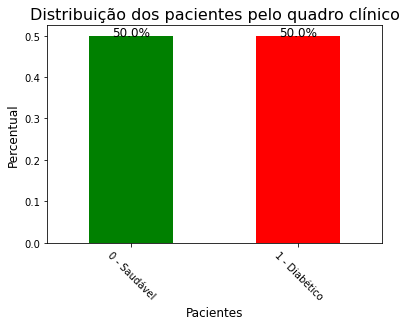

In [75]:
#Distribuição dos dados - dataset Desbalanceado
ax = df_vis['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar', color=['#008000','#FF0000'])
plt.title('Distribuição dos pacientes pelo quadro clínico', fontsize = 16)
plt.xlabel('Pacientes', fontsize=12)
plt.ylabel('Percentual', fontsize = 12)
plt.xticks(rotation=-45)
#Rótulo
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}%'.format(float(retangulo.get_height()*100)).replace(',','.'),
          ha = 'center', fontsize = 12)
plt.show()

A base é super balanceada, 50% para cada categoria

Quais atributos influenciam ou não a diabetes? Vejamos...

=> Pressão alta/HighBP

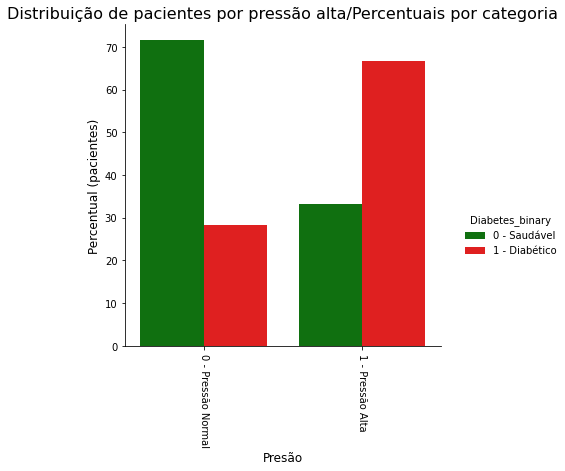

In [77]:
x,y = 'HighBP', 'Diabetes_binary'
choicelist = ['0 - Pressão Normal', '1 - Pressão Alta']
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', order = choicelist))
#Ajustes
plt.title('Distribuição de pacientes por pressão alta/Percentuais por categoria', fontsize = 16)
plt.xlabel('Presão', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-90)

plt.show()

Uma observação importante: os gráficos usando catplot usa percentuais por cateoria, isto é, cada categoria soma 100%. Isso pode passar uma visão enviesada sobre o cenário, uma vez que pode haver poucos registro para certa categoria. Apesar disso, o catplot é ideal para visualizar tendência. Uma forma de contornar essa visão enviesada é trabalhar com o countplot (conforme pode ser visualzado um exemplo abaixo),ou com soma acumulada.

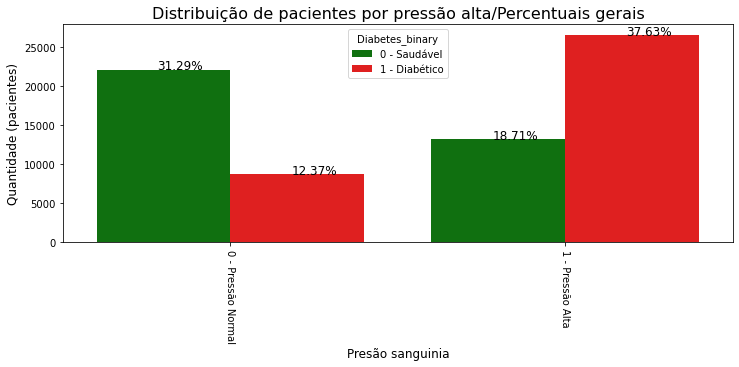

In [77]:
plt.figure(figsize=(12,4))
palette_box = ['#008000','#FF0000']
choicelist = ['0 - Pressão Normal', '1 - Pressão Alta']
x = sns.countplot(x='HighBP', hue='Diabetes_binary', data=df_vis, order = choicelist)
plt.title('Distribuição de pacientes por pressão alta/Percentuais gerais', fontsize = 16)
plt.xlabel('Presão sanguinia', fontsize=12)
plt.ylabel('Quantidade (pacientes)', fontsize = 12)
plt.xticks(rotation=-90)


for retangulo in x.patches:
    x.annotate('{:.2f}'.format((retangulo.get_height()/df_vis.shape[0])*100)+'%',(retangulo.get_x()+0.25, retangulo.get_height()+0.01), ha = 'center', fontsize = 12)

plt.show()

Note como, apesar de mostrar uma tendência, os percentuais são bem diferentes. Como meu objetivo é encontrar tendencia, manterei os gráficos com catplot

Resumo: Pacientes com pressão alta tendem a ter diabetes

In [9]:
import matplotlib.pyplot as plt
import numpy as np

=>Colesterol/HighChol

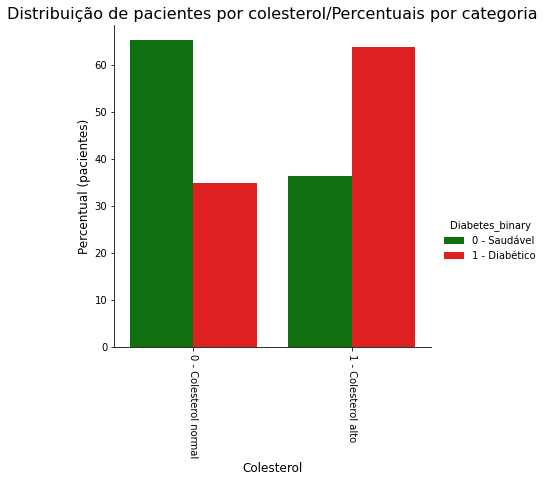

In [169]:
x,y = 'HighChol', 'Diabetes_binary'
choicelist =  ['0 - Colesterol normal', '1 - Colesterol alto']
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', order = choicelist))
#Ajustes
plt.title('Distribuição de pacientes por colesterol/Percentuais por categoria', fontsize = 16)
plt.xlabel('Colesterol', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-90)

plt.show()

R: Pacientes com colesterol alto tendem a ter diabetes

=> Verificação do colesterol/CholCheck

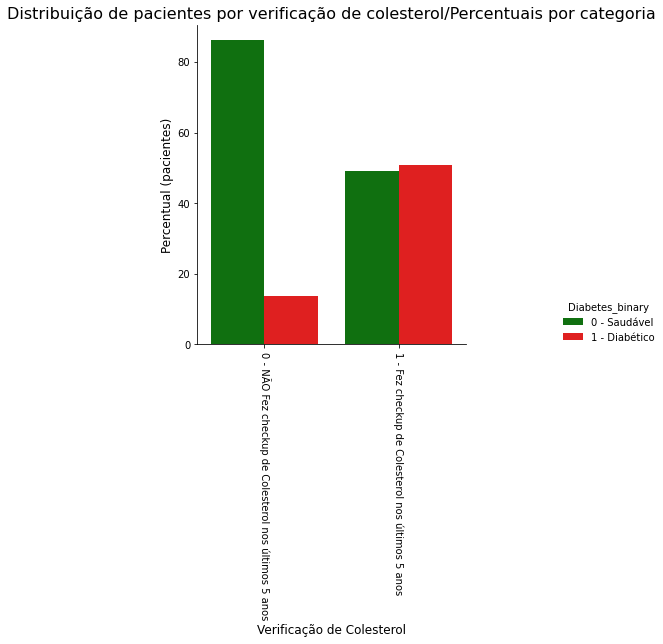

In [171]:
x,y = 'CholCheck', 'Diabetes_binary'
choicelist = ['0 - NÃO Fez checkup de Colesterol nos últimos 5 anos', '1 - Fez checkup de Colesterol nos últimos 5 anos']
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', order = choicelist))
#Ajustes
plt.title('Distribuição de pacientes por verificação de colesterol/Percentuais por categoria', fontsize = 16)
plt.xlabel('Verificação de Colesterol', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-90)

plt.show()

R: dos pacientes que fizeram checkup nos ultimos 5 anos, aproximadamente 52% tinham diabetes. Nesse caso, nada pode-se concluir, pois a busca pelo checkup pode ser justamente porque o paciente já sabia que tinha diabetes e que portanto, precisa de cuidados direcionados

=> Índice de Massa Corporal/BMI

<Figure size 1728x288 with 0 Axes>

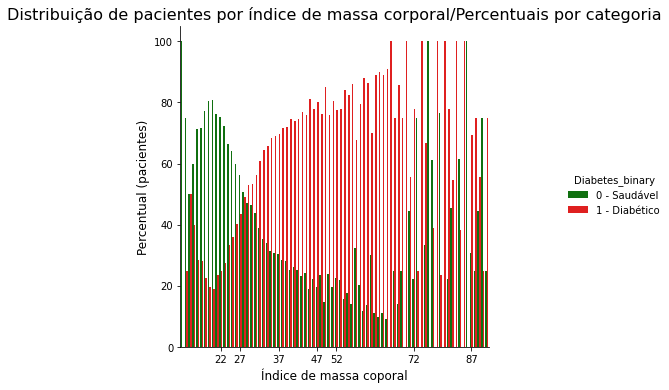

In [189]:
plt.figure(figsize=(24,4))

x,y = 'BMI', 'Diabetes_binary'
choicelist = ['0 - NÃO Fez checkup de Colesterol nos últimos 5 anos', '1 - Fez checkup de Colesterol nos últimos 5 anos']
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por índice de massa corporal/Percentuais por categoria', fontsize = 16)
plt.xlabel('Índice de massa coporal', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks([10, 15, 25, 35, 40, 60, 75]) 

plt.show()

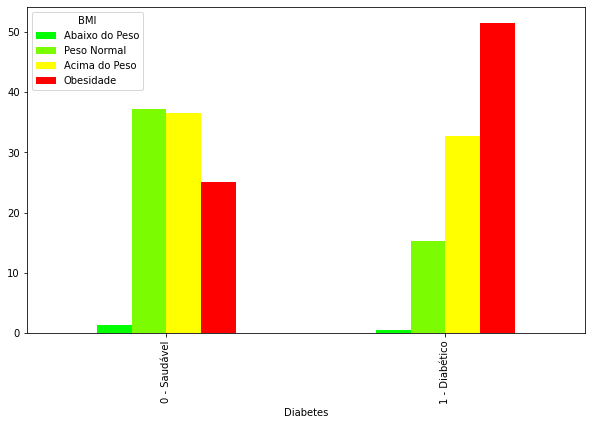

In [98]:
BMI=pd.cut( df_vis['BMI'],bins=[0,18.5,25,30,80],labels=['Abaixo do Peso','Peso Normal','Acima do Peso','Obesidade'])
choicelist = ['Abaixo do Peso','Peso Normal','Acima do Peso','Obesidade']
dd=pd.crosstab(df_vis['Diabetes_binary'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)
Diabetes_sum_lst=list(dd.transpose().sum().values)
for idx in range(dd.values.shape[0]):
    dd.values[idx]= dd.values[idx]/Diabetes_sum_lst[idx]*100

dd.plot(kind="bar",figsize=(10,6), color=['#00FF00','#7CFC00', '#FFFF00', '#FF0000']);

R: pacientes com IMC acima de 30 tem tendência altíssma a terem diabetes, principalmente se for um paciente idoso.

=> Fumante/Smoker

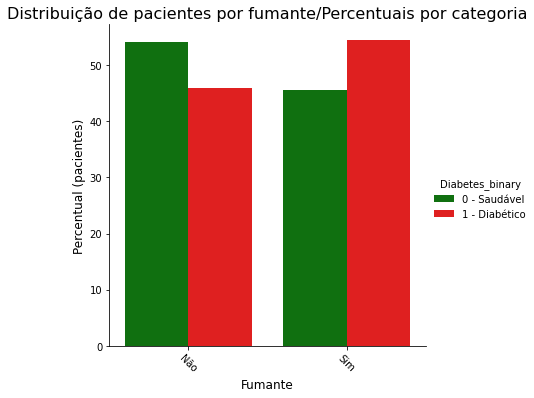

In [190]:
x,y = 'Smoker', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por fumante/Percentuais por categoria', fontsize = 16)
plt.xlabel('Fumante', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: A diferença de pacientes fumantes com e sem diabetes é de aproximadamente apenas 10% a mais para diabéticos, uma correlação consideravelmente baixa

=> Derrame/stroke

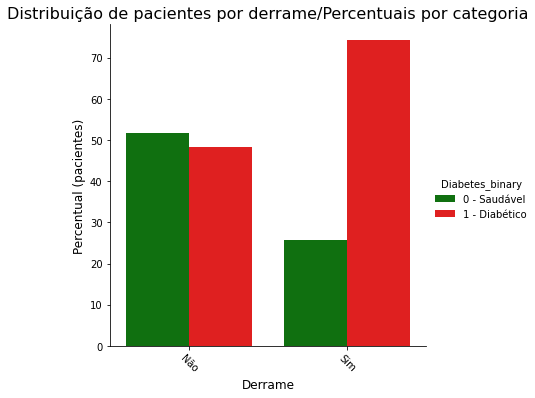

In [194]:
x,y = 'Stroke', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por derrame/Percentuais por categoria', fontsize = 16)
plt.xlabel('Derrame', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: Existe uma tendência altíssima de que pacientes que tiveram derrame tenha também diabetes

=> coronariana ou infarto do miocárdio/HeartDiseaseorAttack

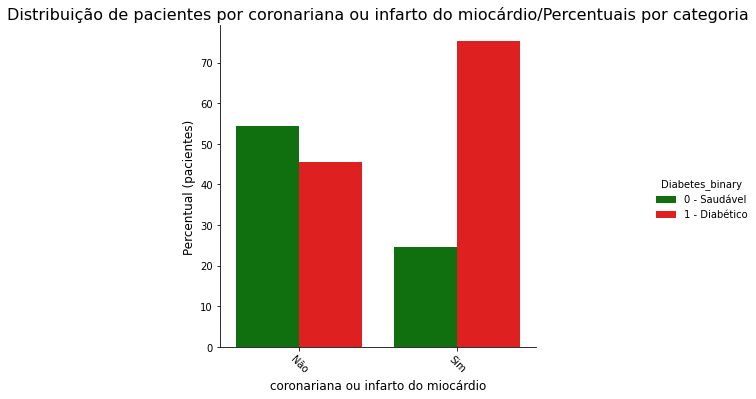

In [196]:
#plt.figure(figsize=(12,4))
x,y = 'HeartDiseaseorAttack', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por coronariana ou infarto do miocárdio/Percentuais por categoria', fontsize = 16)
plt.xlabel('coronariana ou infarto do miocárdio', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: Existe uma tendência altíssima de que pacientes que tiveram coronariana ou infarto do miocárdio tenha também diabetes

=> atividade física/PhysActivity

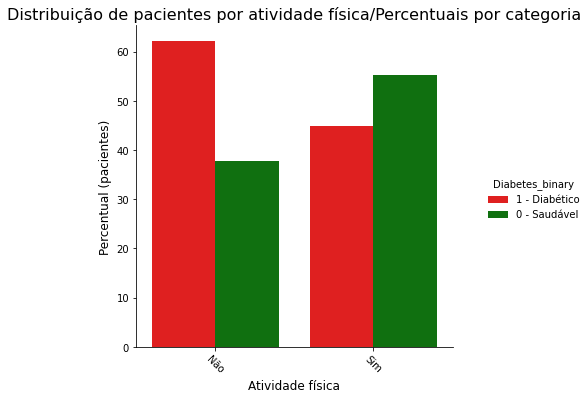

In [203]:
#plt.figure(figsize=(12,4))
x,y = 'PhysActivity', 'Diabetes_binary'
choicelist = ['Não', 'Sim']
palette_box = ['#FF0000', '#008000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por atividade física/Percentuais por categoria', fontsize = 16)
plt.xlabel('Atividade física', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: pacientes que não praticam atividade física aumentam cerca de 20% as chances de ter diabetes

=> Consumo de Frutas/Fruits

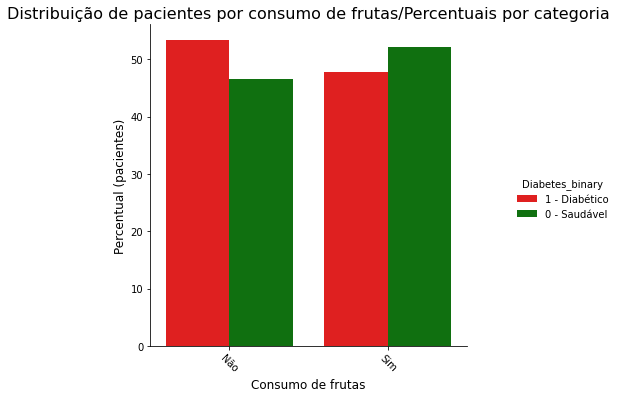

In [204]:
#plt.figure(figsize=(12,4))
x,y = 'Fruits', 'Diabetes_binary'
palette_box = ['#FF0000', '#008000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por consumo de frutas/Percentuais por categoria', fontsize = 16)
plt.xlabel('Consumo de frutas', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: O consumo de frutas parece não influenciar como causa da diabetes

=> Consumo de vegetais/Veggies

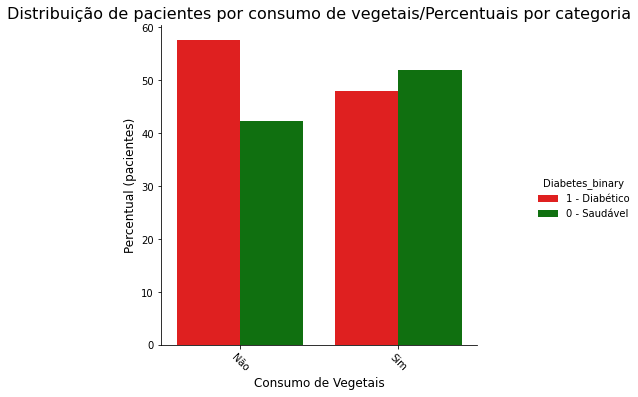

In [205]:
#plt.figure(figsize=(12,4))
x,y = 'Veggies', 'Diabetes_binary'
palette_box = ['#FF0000', '#008000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por consumo de vegetais/Percentuais por categoria', fontsize = 16)
plt.xlabel('Consumo de Vegetais', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: Pacientes que não consomem vegetais tem até 15% mais chances de ter diabetes

=> Consumo alcólico/HvyAlcoholConsump

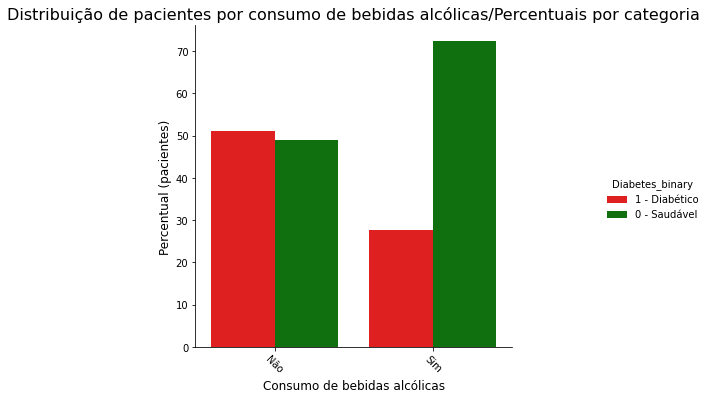

In [206]:
#plt.figure(figsize=(12,4))
x,y = 'HvyAlcoholConsump', 'Diabetes_binary'
palette_box = ['#FF0000', '#008000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por consumo de bebidas alcólicas/Percentuais por categoria', fontsize = 16)
plt.xlabel('Consumo de bebidas alcólicas', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: Existe uma tendência altíssima de que pacientes que consomem bebida reduza em até 40% as chances de ter diabetes

=> Plano de saúde/AnyHealthcare

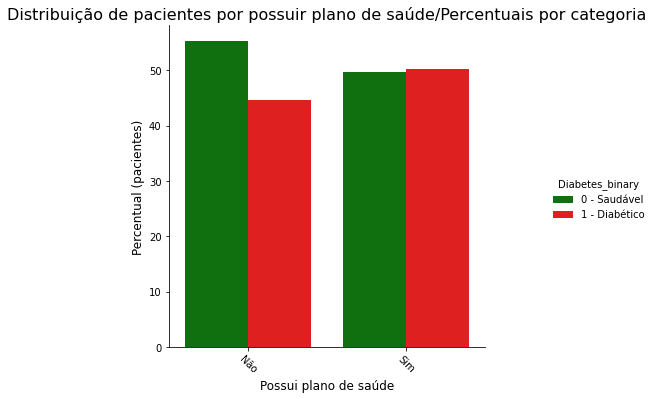

In [210]:
#plt.figure(figsize=(12,4))
x,y = 'AnyHealthcare', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por possuir plano de saúde/Percentuais por categoria', fontsize = 16)
plt.xlabel('Possui plano de saúde', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: pacientes que não têm plano de saúde aumenta em até 10% as chances de ter diabetes

=> Consultou a médico/NoDocbcCost

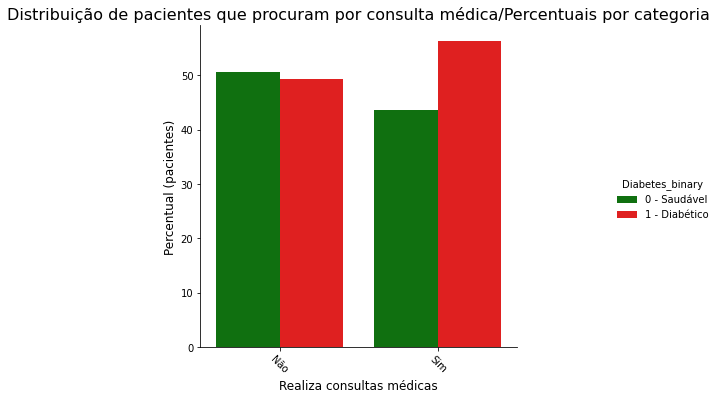

In [212]:
#plt.figure(figsize=(12,4))
x,y = 'NoDocbcCost', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes que procuram por consulta médica/Percentuais por categoria', fontsize = 16)
plt.xlabel('Realiza consultas médicas', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: ESTRANHAMENTE pacientes que realizam consultas médicas têm aproximadamente 10% de chances a mais de ter diabetes. Aqui, percebe-se que correlação não é causalidade

=> Sua saúde/GenHlth

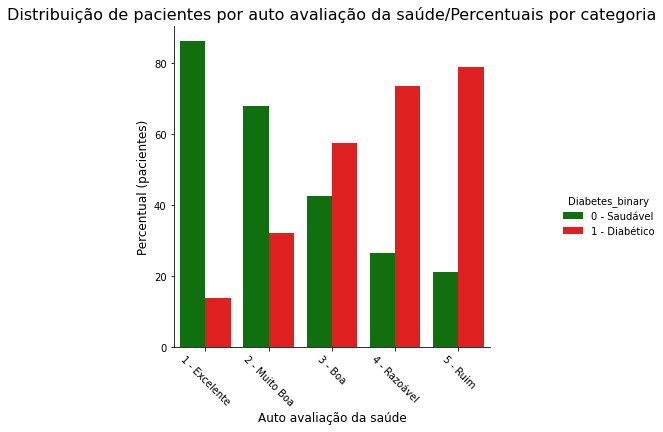

In [213]:
#plt.figure(figsize=(12,4))
x,y = 'GenHlth', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por auto avaliação da saúde/Percentuais por categoria', fontsize = 16)
plt.xlabel('Auto avaliação da saúde', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: pacientes que auto avaliam a saúde como boa, razoável ou ruim (principalmente as duas últimas) tem altíssima probabilidade de ser diabético

=> Saude mental/MentHlth

<Figure size 2160x288 with 0 Axes>

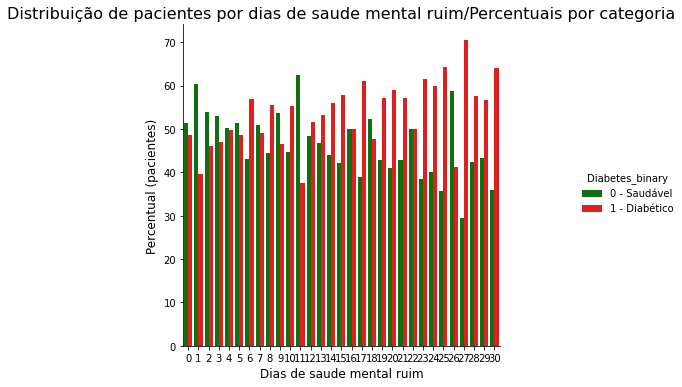

In [216]:
plt.figure(figsize=(30,4))

x,y = 'MentHlth', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por dias de saude mental ruim/Percentuais por categoria', fontsize = 16)
plt.xlabel('Dias de saude mental ruim', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
#plt.xticks([10, 15, 25, 35, 40, 60, 75]) 

plt.show()

=> doença física ou lesão/PhysHlth

<Figure size 2160x288 with 0 Axes>

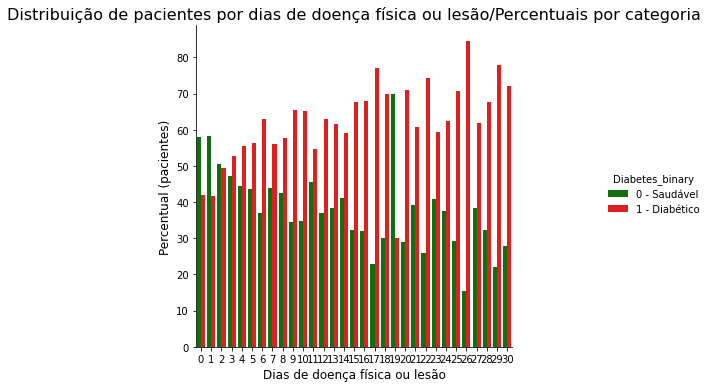

In [217]:
plt.figure(figsize=(30,4))

x,y = 'PhysHlth', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por dias de doença física ou lesão/Percentuais por categoria', fontsize = 16)
plt.xlabel('Dias de doença física ou lesão', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
#plt.xticks([10, 15, 25, 35, 40, 60, 75]) 

plt.show()

R: pacientes que na maior parte do mês sofre com doença física ou lesão tem tedência a ter diabetes

=> dificuldades para caminhar/DiffWalk

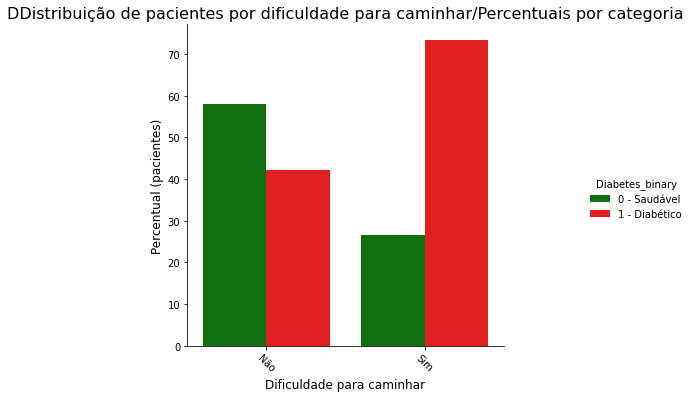

In [218]:
#plt.figure(figsize=(12,4))
x,y = 'DiffWalk', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por dificuldade para caminhar/Percentuais por categoria', fontsize = 16)
plt.xlabel('Dificuldade para caminhar', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: pacientes que tem dificuldade de caminhar têm tendência altíssima a ter diabetes (mais de 40% de chances) 

=> Gênero/Sex

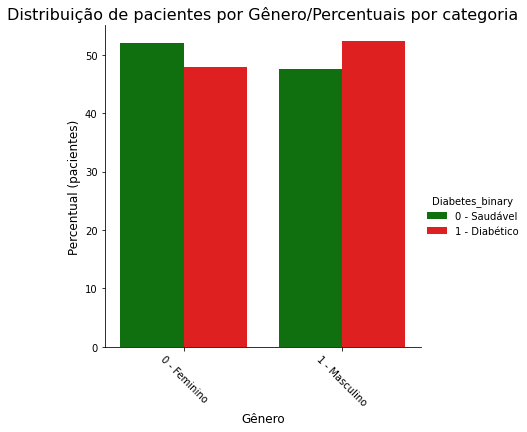

In [219]:
#plt.figure(figsize=(12,4))
x,y = 'Sex', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar'))
#Ajustes
plt.title('Distribuição de pacientes por Gênero/Percentuais por categoria', fontsize = 16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
plt.xticks(rotation=-45)

plt.show()

R: o gênero é um fator que aparentemente não influência a diabetes

=> Idade/Age

<Figure size 2160x288 with 0 Axes>

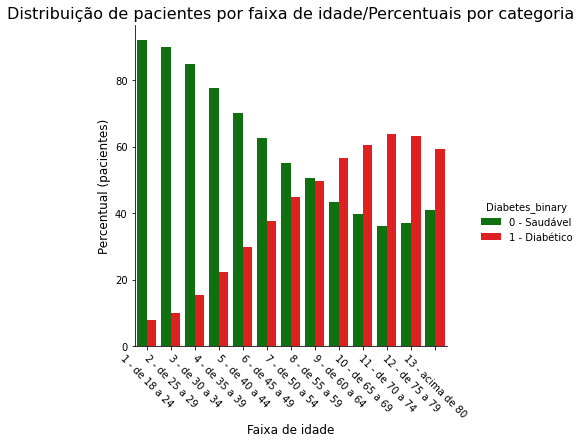

In [222]:
plt.figure(figsize=(30,4))

x,y = 'Age', 'Diabetes_binary'
palette_box = ['#008000','#FF0000']
choicelist = ['1 - de 18 a 24','2 - de 25 a 29','3 - de 30 a 34','4 - de 35 a 39','5 - de 40 a 44','6 - de 45 a 49','7 - de 50 a 54','8 - de 55 a 59',
'9 - de 60 a 64','10 - de 65 a 69','11 - de 70 a 74','12 - de 75 a 79','13 - acima de 80']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', order = choicelist))
#Ajustes
plt.title('Distribuição de pacientes por faixa de idade/Percentuais por categoria', fontsize = 16)
plt.xlabel('Faixa de idade', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
#plt.xticks([10, 15, 25, 35, 40, 60, 75]) 
plt.xticks(rotation=-45)

plt.show()

R: pacientes acima dos 60 anos tem mais tendência a ter diabetes do que pacientes mais jovens.

=> Escolaridade/Education

<Figure size 2160x288 with 0 Axes>

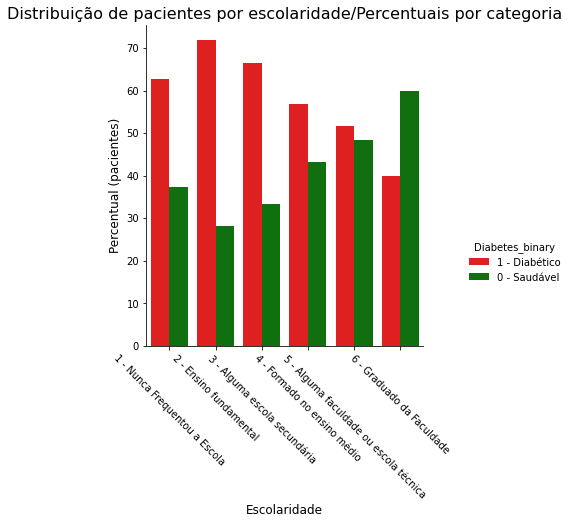

In [225]:
plt.figure(figsize=(30,4))

x,y = 'Education', 'Diabetes_binary'
palette_box = ['#FF0000','#008000']
choicelist = ['1 - Nunca Frequentou a Escola', '2 - Ensino fundamental', '3 - Alguma escola secundária', '4 - Formado no ensino médio', '5 - Alguma faculdade ou escola técnica', '6 - Graduado da Faculdade']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', order = choicelist))
#Ajustes
plt.title('Distribuição de pacientes por escolaridade/Percentuais por categoria', fontsize = 16)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
#plt.xticks([10, 15, 25, 35, 40, 60, 75]) 
plt.xticks(rotation=-45)

plt.show()

R: Pacientes com menor ou nenhum grau de estudos são mais tendencisos a ter diabetes. Pode ser reflexo do nível de instrução, qualdiade de vida, renda, entre outros fatores...

=> Renda/Income

<Figure size 2160x288 with 0 Axes>

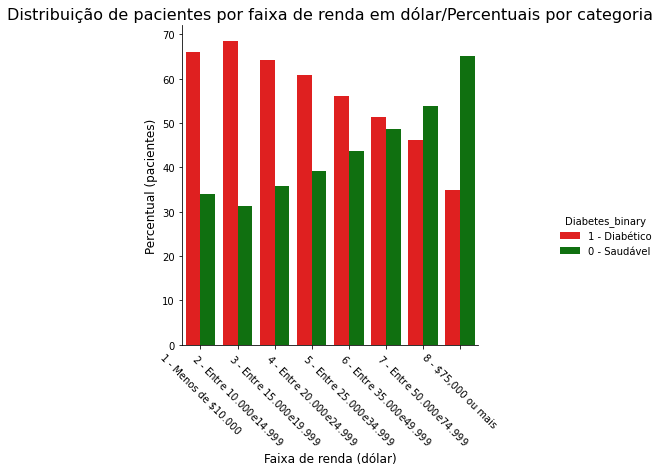

In [78]:
plt.figure(figsize=(30,4))

x,y = 'Income', 'Diabetes_binary'
palette_box = ['#FF0000','#008000']
choicelist = ['1 - Menos de $10.000', '2 - Entre $10.000 e $14.999', '3 - Entre $15.000 e $19.999', '4 - Entre $20.000 e $24.999', '5 - Entre $25.000 e $34.999', '6 - Entre $35.000 e $49.999', '7 - Entre $50.000 e $74.999', '8 - $75,000 ou mais']
sns.set_palette(palette_box)
(df_vis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar', order = choicelist))
#Ajustes
plt.title('Distribuição de pacientes por faixa de renda em dólar/Percentuais por categoria', fontsize = 16)
plt.xlabel('Faixa de renda (dólar)', fontsize=12)
plt.ylabel('Percentual (pacientes)', fontsize = 12)
#plt.xticks([10, 15, 25, 35, 40, 60, 75]) 
plt.xticks(rotation=-45)

plt.show()

R: Pacientes com renda mais baixa são mais tendenciosas a ter diabetes

=> Distribuição por categoria

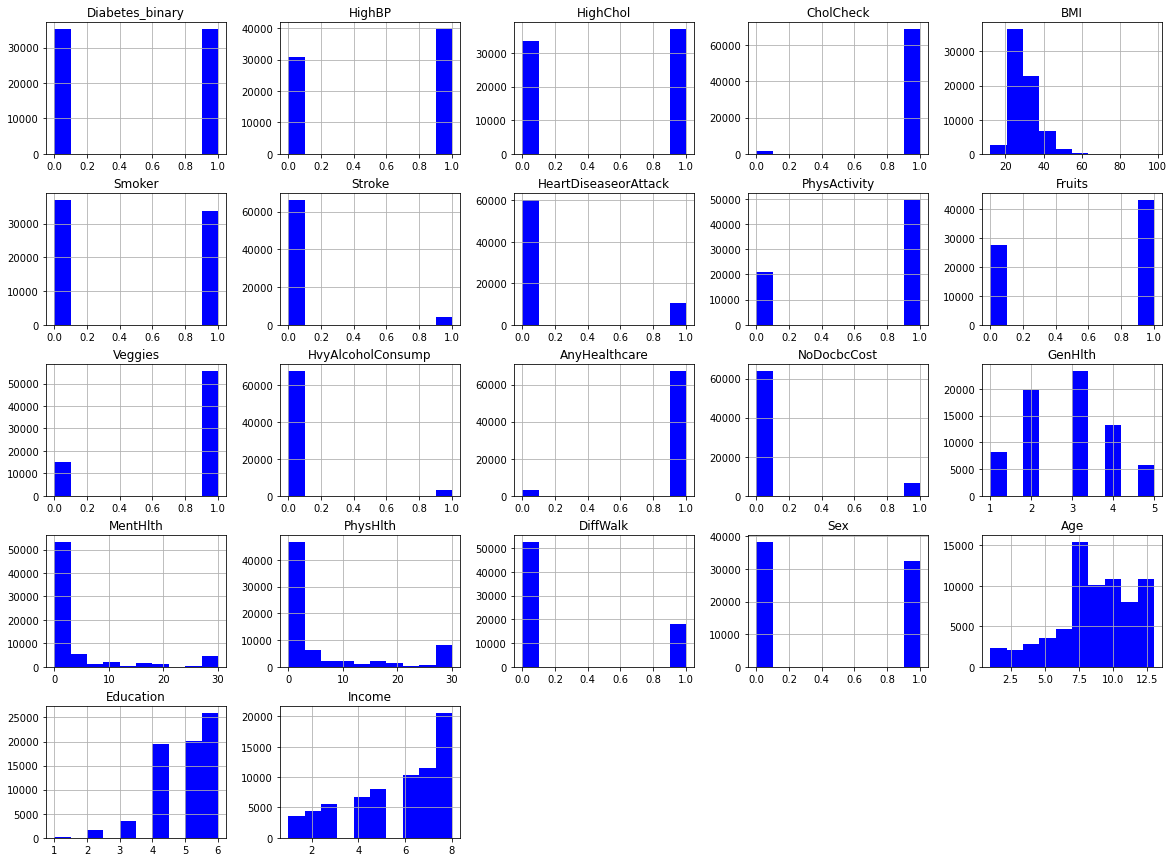

In [101]:
df.hist(figsize=(20,15), color = 'b')
plt.show()

Relação dos atributos que não são categóricos: A nuvem de pontos para esse esses atributos não colabora muita para encontrar as relações, pois são muito os pontos de união.

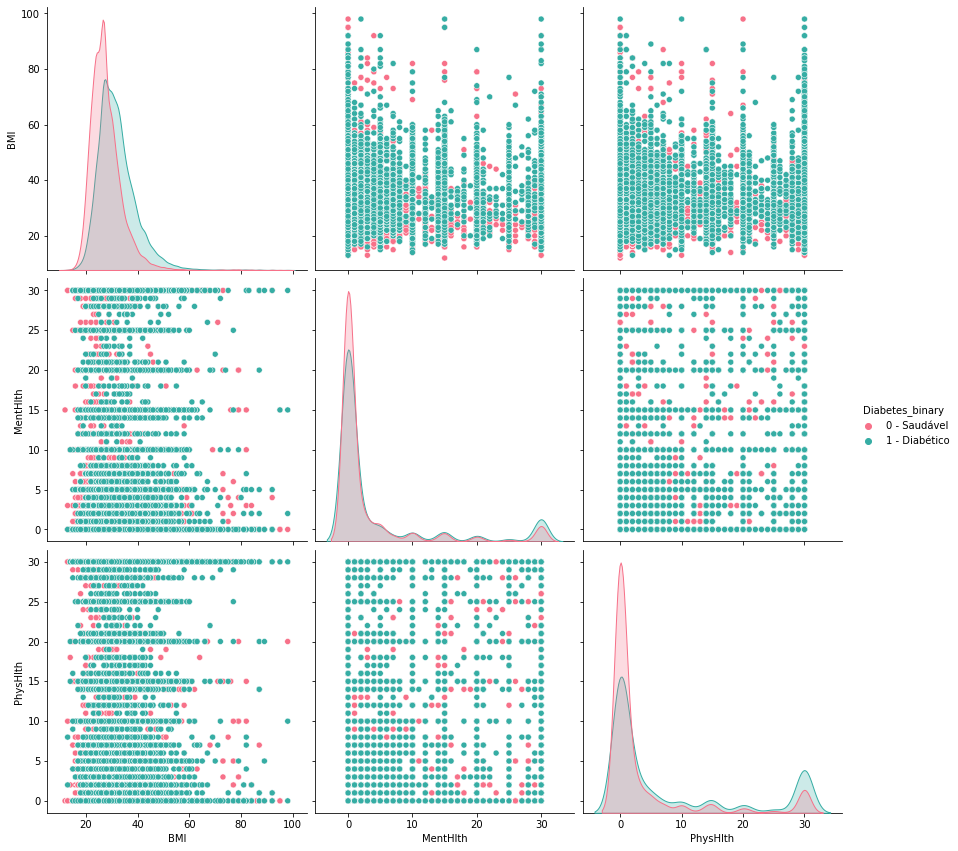

In [102]:
palette_box = ['#FF0000','#008000']
sns.pairplot(df_vis, hue='Diabetes_binary', palette="husl",height=4)

Avaliando se o problema não pode ser apenas pelo recorte visto: através do gráfico 3d é possivel analisar de todas as faces através do processo de interação

In [122]:
import plotly.express as px

px.scatter_3d(df, x = "BMI", y = "MentHlth", z = "PhysHlth", 
              color = "Diabetes_binary", 
              log_x = True, log_z = True)

Analisando a correlação positiva x negativa dos atributos com a diabtes

<AxesSubplot:title={'center':'Correlação com o diabtes (target)'}>

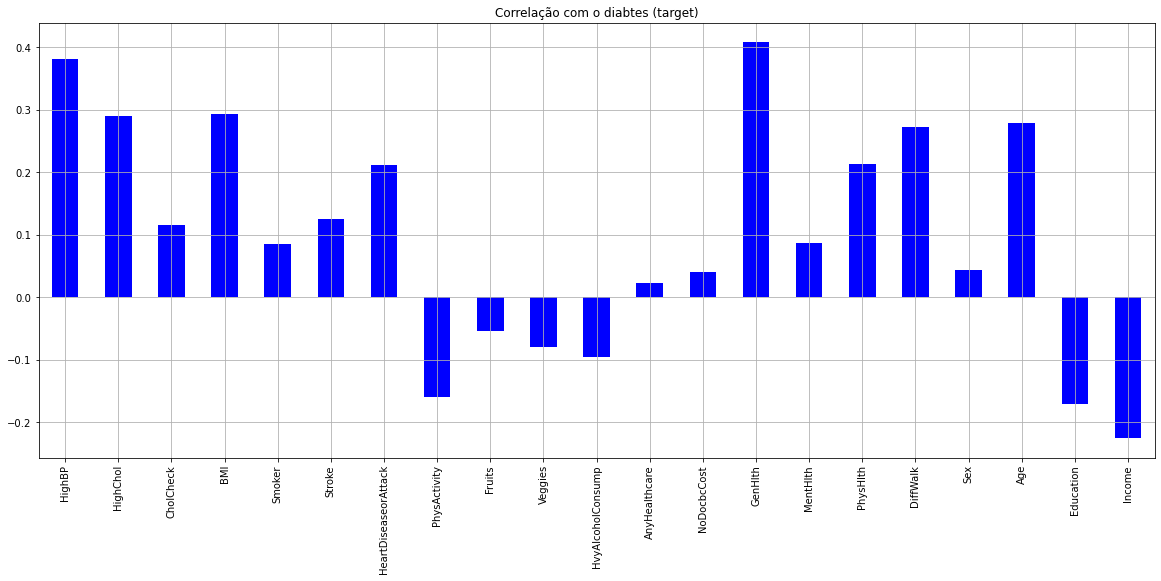

In [15]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlação com o diabtes (target)",color="Blue")

R: De acordo com esse gráfico de correlação, percebe-se que os tributos mais correlacionados com a diabetes são respectivamente: GenHelh (auto avaliação), HighBP (Pressão alta), BMI (índice de massa corporal), HighChol (Colesterol alto), Age (idade), DiffWalk (Dificuldade de caminhar) e quase empatados, PhysHlth (saúde física) e HeartDiseaseorAttack (ataque cardíaco)

Enquanto os mais correlacionados para não ter diabetes são renda, escolaridade, atividade física

#### Machine Learning

In [52]:
#Divisão
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [41]:
target = df['Diabetes_binary']
df.drop(["Diabetes_binary"], axis = 1, inplace=True)
#df_vis.head(10)

In [98]:
#Divisão da base em 60% para treino e 40% para teste
train_x, test_x, train_y, test_y = train_test_split(df, target, test_size=0.4)
#Normalizando os dados:
scaler = StandardScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

In [105]:
#Com apenas um modelo:
model = DecisionTreeClassifier( max_depth= 12)
treino = model.fit(scaled_train_x, train_y)
teste = model.score(scaled_test_x, test_y)
predicao = model.predict(scaled_test_x)
print(f'Treino: {teste} -> Teste: {teste} -> Predição: {np.sum(predicao==test_y)/test_y.shape[0]}')

Treino: 0.7262439438412844 -> Teste: 0.7262439438412844 -> Predição: 0.7262439438412844


Sem normalização e sem o max_depth= 12:
Treino: 0.6547370654595608 -> Teste: 0.6547370654595608 -> Predição: 0.6547370654595608
Com normalização e sem o max_depth= 12:
Treino: 0.6527920217844891 -> Teste: 0.6527920217844891 -> Predição: 0.6527920217844891

In [108]:

clf = SVC(kernel='rbf', C=1.0)
clf.fit(train_x, train_y)
y_pred=clf.predict(test_x)
print('Treino: {:.4f}'.format(clf.score(train_x, train_y)))
print('Teste: {:.4f}'.format(clf.score(test_x, test_y)))

Treino: 0.7494
Teste: 0.7475


##### Modelos de Classificação

In [73]:
#Com um conjunto de modelos:
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

#para normalização
from sklearn.pipeline import Pipeline

In [92]:
#Definido os modelos para execução
models = {
    "Logistic Classifier": RidgeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    
}

In [70]:
train_x, test_x, train_y, test_y = train_test_split(df, target, test_size=0.4)
scaler = StandardScaler()
#executando os modelos em dados normalizados... (Obs: não tornou os modelos mais precisos)
for model_name, model_obj in models.items():
    model = Pipeline([
        ("Scaler", scaler),
        ("Model", model_obj)
    ])
    treino = model.fit(train_x, train_y)
    teste = model.score(test_x, test_y)
    predicao = model.predict(test_x)
    print(f'{model_name}: Treino: {teste:.02f} -> Teste: {teste:.02f} -> Predição: {(np.sum(predicao==test_y)/test_y.shape[0]):.02f}')


Logistic Classifier: Treino: 0.75 -> Teste: 0.75 -> Predição: 0.75
Stochastic Gradient Descent: Treino: 0.74 -> Teste: 0.74 -> Predição: 0.74
Random Forest Classifier: Treino: 0.74 -> Teste: 0.74 -> Predição: 0.74
KNN: Treino: 0.71 -> Teste: 0.71 -> Predição: 0.71
Decision Tree: Treino: 0.66 -> Teste: 0.66 -> Predição: 0.66
SVM: Treino: 0.75 -> Teste: 0.75 -> Predição: 0.75


Execução 01:
Logistic Classifier: Treino: 0.75 -> Teste: 0.75 -> Predição: 0.75
Stochastic Gradient Descent: Treino: 0.74 -> Teste: 0.74 -> Predição: 0.74
Random Forest Classifier: Treino: 0.74 -> Teste: 0.74 -> Predição: 0.74
KNN: Treino: 0.71 -> Teste: 0.71 -> Predição: 0.71
Decision Tree: Treino: 0.66 -> Teste: 0.66 -> Predição: 0.66
SVM: Treino: 0.75 -> Teste: 0.75 -> Predição: 0.75

##### Trabalhando além da acurácia

In [93]:
#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [94]:
train_x, test_x, train_y, test_y = train_test_split(df, target, test_size=0.4)
scaler = StandardScaler()
#executando os modelos em dados normalizados... (Obs: não tornou os modelos mais precisos)
scores = list()
for model_name, model_obj in models.items():
    model = Pipeline([
        ("Scaler", scaler),
        ("Model", model_obj)
    ])
    treino = model.fit(train_x, train_y)
    teste = model.score(test_x, test_y)
    predicao = model.predict(test_x)

    scores.append({
    "Model": model_name,
    "accuracy_score": accuracy_score(test_y, predicao), 
    "precision_score": precision_score(test_y, predicao),
    "recall_score": recall_score(test_y, predicao),
    "f1_score": f1_score(test_y, predicao), 
    "roc_auc_score": roc_auc_score(test_y, predicao),
    })
pd.DataFrame(scores)

    #print(f'{model_name}: Treino: {teste:.02f} -> Teste: {teste:.02f} -> Predição: {(np.sum(predicao==test_y)/test_y.shape[0]):.02f}')


Model  accuracy_score  precision_score  recall_score  \
0          Logistic Classifier        0.746543         0.734072      0.775733   
1  Stochastic Gradient Descent        0.742618         0.729313      0.774253   
2     Random Forest Classifier        0.739187         0.723495      0.777002   
3                          KNN        0.712381         0.702877      0.739002   
4                Decision Tree        0.654313         0.656492      0.652002   
5                          SVM        0.750964         0.727713      0.804569   

   f1_score  roc_auc_score  
0  0.754328       0.746449  
1  0.751111       0.742516  
2  0.749295       0.739065  
3  0.720487       0.712295  
4  0.654239       0.654320  
5  0.764213       0.750791

R: com parâmetros default, o SVM e o Logistic Regression aparentemente são os que mais se adaptaram ao dadaset

##### Modelos de Regressão

In [91]:
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [95]:
#Definido os modelos para execução
models = {
    "Logistic Regressor": LogisticRegression(),
    "Stochastic Gradient Descent Regressor": SGDRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVM": SVR(),
    
}

In [81]:
scaler = StandardScaler()
#executando os modelos em dados normalizados... (Obs: não tornou os modelos mais precisos)
for model_name, model_obj in models.items():
    model = Pipeline([
        ("Scaler", scaler),
        ("clf", model_obj)
    ])
    treino = model.fit(train_x, train_y)
    teste = model.score(test_x, test_y)
    predicao = model.predict(test_x)
    print(f'{model_name}: Treino: {teste:.02f} -> Teste: {teste:.02f} -> Predição: {(np.sum(predicao==test_y)/test_y.shape[0]):.02f}')


Logistic Regressor: Treino: 0.74 -> Teste: 0.74 -> Predição: 0.74
Stochastic Gradient Descent Regressor: Treino: 0.30 -> Teste: 0.30 -> Predição: 0.00
Random Forest Regressor: Treino: 0.26 -> Teste: 0.26 -> Predição: 0.04
KNN Regressor: Treino: 0.18 -> Teste: 0.18 -> Predição: 0.26
Decision Tree Regressor: Treino: -0.37 -> Teste: -0.37 -> Predição: 0.65
Gradient Boosting Regressor: Treino: 0.32 -> Teste: 0.32 -> Predição: 0.00
SVM: Treino: 0.25 -> Teste: 0.25 -> Predição: 0.00


R: Como era de se esperar, no geral acurácia dos modelos de regressão para este dataset é bem ruim, uma vez que seu rótulo é categórico e não numérico. Modelos de classificação são mais adequados para tal dataset

##### Trabalhando com outras métricas de regressão

In [88]:
#Métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error

In [96]:
scaler = StandardScaler()
#executando os modelos em dados normalizados... (Obs: não tornou os modelos mais precisos)
scores = list()
for model_name, model_obj in models.items():
    model = Pipeline([
        ("Scaler", scaler),
        ("clf", model_obj)
    ])
    treino = model.fit(train_x, train_y)
    teste = model.score(test_x, test_y)
    predicao = model.predict(test_x)
    scores.append({
    "Model": model_name,
    "r2_score": r2_score(test_y, predicao), 
    "mean_absolute_error": mean_absolute_error(test_y, predicao), 
    "mean_squared_error": mean_squared_error(test_y, predicao),
    "max_error": max_error(test_y, predicao),
    })
pd.DataFrame(scores)


Model  r2_score  mean_absolute_error  \
0                     Logistic Regressor -0.010160             0.252537   
1  Stochastic Gradient Descent Regressor  0.309088             0.350223   
2                Random Forest Regressor  0.266667             0.348642   
3                          KNN Regressor  0.194741             0.340170   
4                Decision Tree Regressor -0.375302             0.345516   
5            Gradient Boosting Regressor  0.330263             0.338970   
6                                    SVM  0.262310             0.300942   

   mean_squared_error  max_error  
0            0.252537   1.000000  
1            0.172726   1.625876  
2            0.183331   1.000000  
3            0.201313   1.000000  
4            0.343822   1.000000  
5            0.167433   1.067734  
6            0.184421   1.355110

In [107]:
lg = LogisticRegression(max_iter = 1200)
lg.fit(train_x, train_y)
y_pred=lg.predict(test_x)

print('Training set score: {:.4f}'.format(lg.score(train_x, train_y)))

print('Test set score: {:.4f}'.format(lg.score(test_x, test_y)))

Training set score: 0.7474
Test set score: 0.7492


Apesar dos regressores não serem adequados para tal tipo de dataset, veja que sua acurácia pode melhorar à medida que adapta parâmetros ao dataset. Ideal seria fazer para ambas as categorias de modelos (Classificadores e Regressores) uma análise via PCA, hiperparametro ou mesmo greadsearch (não tive tempo)

Outro ponto importante: fazer uma análise somente com os atributos correlacionados positivamente. A acurácia podera melhorar (ou o próprio PCA pode ser usado para selecionar somente os melhores atributos)